## Machine Learning
#### K-means algorithm
*Look into heirarchical clustering

Check out later:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

In [5]:
import math
import csv
import random
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

In [15]:
pleiades4 = pd.read_csv("pleiades_4_degrees.csv")
#pleiades4 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
pleiades4.loc[:, 'parallax_arcsec'] = pleiades4['parallax'].apply(lambda x: x*.001)
pleiades4.loc[:, 'R'] = pleiades4['parallax_arcsec'].apply(distance)
pleiades4.loc[:, 'x'] = pleiades4.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades4.loc[:, 'y'] = pleiades4.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades4.loc[:, 'z'] = pleiades4.apply(lambda r: z(r['R'], r['b']), axis=1)
pleiades4.loc[:, 'magnitude'] = pleiades4.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
pleiades4

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,parallax_arcsec,R,x,y,z,magnitude
0,1635721458409799680,Gaia DR2 69874243118711040,69874243118711040,868666957,2015.5,56.583196,0.063882,25.475364,0.033364,7.418772,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007419,134.793201,54.978072,-94.723564,78.575219,5.832964
1,1635721458409799680,Gaia DR2 69838302833692160,69838302833692160,297608156,2015.5,56.156051,0.043813,25.137591,0.025241,7.565130,...,0.126018,0.128349,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007565,132.185433,24.796554,-50.469740,119.628279,7.196620
2,1635721458409799680,Gaia DR2 69837134602589952,69837134602589952,452803383,2015.5,56.214727,0.126645,25.087781,0.102259,6.996507,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.006997,142.928467,30.913376,-52.061710,129.470028,11.231953
3,1635721458409799680,Gaia DR2 69838131035001856,69838131035001856,458487429,2015.5,56.134121,0.124854,25.136601,0.083792,7.575432,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007575,132.005673,23.269671,-49.269406,120.235377,11.853975
4,1635721458409799680,Gaia DR2 69835622774091264,69835622774091264,647163691,2015.5,56.316027,0.062640,25.109959,0.040834,12.282982,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.012283,81.413456,22.452457,-33.223344,70.853705,10.009615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1635721458409799680,Gaia DR2 64162417653982976,64162417653982976,1612626618,2015.5,57.524610,0.059695,23.004320,0.028482,7.231888,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007232,138.276487,-4.438301,-39.898190,132.320908,9.705495
1347,1635721458409799680,Gaia DR2 64124136607381888,64124136607381888,610607639,2015.5,57.159938,0.689060,22.564261,0.385290,7.167310,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007167,139.522368,-5.246188,-104.282160,92.542962,14.175600
1348,1635721458409799680,Gaia DR2 64118918223293952,64118918223293952,1277605897,2015.5,57.531978,2.845990,22.703402,0.951165,6.953458,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.006953,143.813332,8.400035,-69.604883,125.566214,15.138672
1349,1635721458409799680,Gaia DR2 64453887017111808,64453887017111808,314846166,2015.5,55.456749,0.194078,22.493409,0.106399,7.227332,...,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN,0.007227,138.363636,-122.558872,-36.984256,-52.497461,12.090630


In [11]:
train = pleiades4.head(len(pleiades4)*.8)
test = pleiades4.tail(len(pleiades4)*.2)

#weighted fractions
from sklearn.cluster import KMeans

# create kmeans object, 2 clusters
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(train.values) #X = data set excluding name of galaxy
# save new clusters for chart
y_km = kmeans.predict(train.values) #or fit_predict

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [1080.8] of <class 'float'>

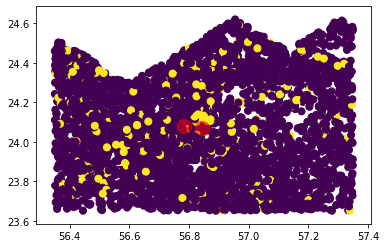

In [4]:
#.values - changes pandas dataframe to numpy array
plt.scatter(train.values[:, 0], train.values[:, 1], c=y_km, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [21]:
np.random.seed(42)

df = pleiades4[['pmra', 'pmdec', 'R', 'x', 'y', 'z']]

def process():
    data = scale(df)
    n_samples, n_features = data.shape
    print("n_samples %d, \t n_features %d"
              % (n_samples, n_features))
    return data

def kmeans(estimator, name, data):
    estimator.fit(data)

In [29]:
data = process()
kmeans(KMeans(init='k-means++', n_clusters=2, n_init=10),
                  name="k-means++", data=data)

kmeans(KMeans(init='random', n_clusters=2, n_init=10),
              name="random", data=data)


n_samples 1351, 	 n_features 6


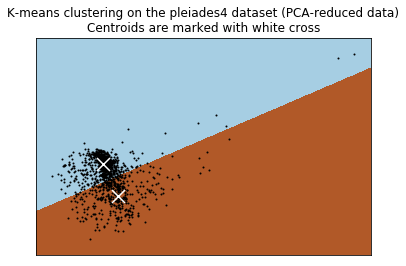

In [28]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=2).fit(data)
kmeans(KMeans(init=pca.components_, n_clusters=2, n_init=1),
              name="PCA-based",
              data=data)

reduced_data = PCA(n_components=2).fit_transform(data)
km = KMeans(init='k-means++', n_clusters=2, n_init=10)
km.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the pleiades4 dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [31]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
# Centroid values
centroids = kmeans.cluster_centers_

print(centroids)

[[ 0.46038433 -0.36935215 -1.03055544 -1.08678774  0.03120588 -1.19896228]
 [-0.15392471  0.35396827  0.34777824  0.56984753 -1.28104848 -0.68306997]
 [-0.07499517 -0.02045971  0.16674689  0.10479972  0.43940204  0.57448678]]
